In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
num_straps = 5
freq = 0.5e9
w0 = 2*np.pi*freq
C = 1.12e-12
L = 1/(w0**2*C)
print('C: ', C, ' F', 'L: ', L, 'H')
M = 4.7/w0
print('M: ', M, ' H')

RL = 2
Rc = 0.000
Rt = RL+ Rc

def get_Zmat(num_straps, w, S, M, R0):
    Zmat = np.zeros((num_straps, num_straps), dtype=complex)
    for i in range(num_straps):
        for j in range(num_straps):
            if i == j:
                Zmat[i,j] = -S
                if i !=0:
                    Zmat[i, j-1] = 1j*w*M
                if i != num_straps-1:
                    Zmat[i,j+1] = 1j*w*M
    Zmat[-1,-1] = -S - R0
    return Zmat


def solve_TWA(f, w0, num_straps, Vin, L, C, M, Rt, R0):
    w = 2*np.pi*f
    S = Rt + 1j*w*L - 1j/(w*C) # make function 
    #print('S: ', S)
    V_vec= np.zeros((num_straps, 1), dtype=complex)
    V_vec[0] = Vin

    # calaculate Zin0 for the reflection coeffecient 
    S0 = Rt + 1j*w0*L - 1j/(w0*C) # S0 at resonance
    Zmat0 = get_Zmat(num_straps, w0, S0, M, R0)
    I_vec0 = np.matmul(np.linalg.inv(Zmat0), V_vec)
    Zin0 = Vin/I_vec0[0]
    #print('R0: ', R0, 'Zin0: ', Zin0)

    Zmat = get_Zmat(num_straps, w, S, M, R0)
    #print(Zmat)
    I_vec = np.matmul(np.linalg.inv(Zmat), V_vec)
    Pt = 0.5*np.abs(I_vec[-1])**2*R0
    Pf = np.abs(0.5*np.real(np.conjugate(I_vec[0])*Vin)) # absolute value to get rid of sign? 
    #print(np.conjugate(I_vec[0])*Vin)
    Zin = Vin/I_vec[0]
    #print(I_vec)
    #print(Zin)
    
    T = Pt/Pf
    rho = (Zin - Zin0)/(Zin + Zin0)
    R = (np.abs(rho)**2)
    A = 1 - (R + T)

    return T, R, A, Pt, Pf, I_vec, Zin


C:  1.12e-12  F L:  9.046534253780158e-08 H
M:  1.4960564650638161e-09  H


In [100]:
T, R, A, Pt, Pf, I_vec, Zin = solve_TWA(w0/(2*np.pi), w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
Zin

array([-5.9587329-0.j])

In [101]:
# scan the Zin for different Rt:
num_straps = 3
Rt_array = np.linspace(0, 6, 100)
Zin_array = np.zeros_like(Rt_array, dtype=complex)
for i in range(Rt_array.shape[0]):
    Rt = Rt_array[i]
    T, R, A, Pt, Pf, I_vec, Zin = solve_TWA(w0/(2*np.pi), w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
    Zin_array[i] = Zin[0]

Text(0, 0.5, 'Z$_{in}$')

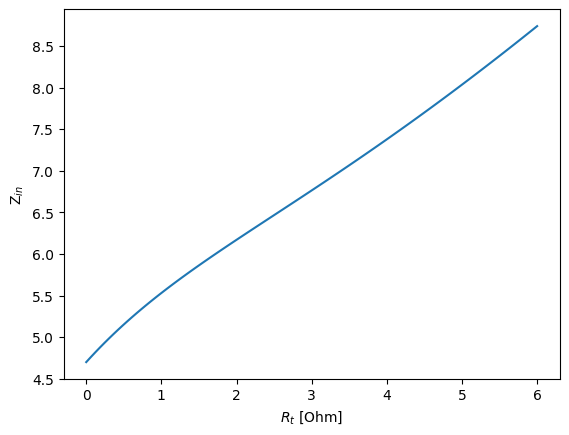

In [102]:
plt.plot(Rt_array, -np.real(Zin_array))
plt.xlabel(r'$R_t$ [Ohm]')
plt.ylabel(r'Z$_{in}$')
#plt.plot(Rt_array, np.imag(Zin_array))

In [121]:
# scan the Zin for different Rt:
num_straps = 8
Rt_scan = np.array([0.01, 0.1, 1.00, 2.00])
f_array = np.linspace(0.48e9, 0.52e9, 1000)
R_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)
T_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)
A_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)

for i in range(Rt_scan.shape[0]):
    for j in range(f_array.shape[0]):
        Rt = Rt_scan[i]
        f = f_array[j]
        T, R, A, Pt, Pf, I_vec, Zin = solve_TWA(f, w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
        R_array[i, j] = R[0]
        T_array[i, j] = T[0]
        A_array[i, j] = A[0]



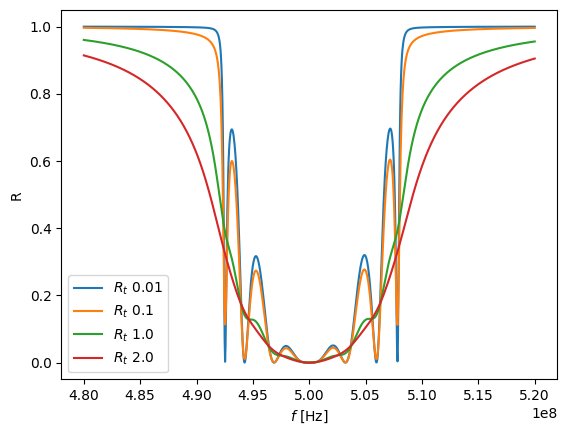

In [115]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(R_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'R')
plt.legend()

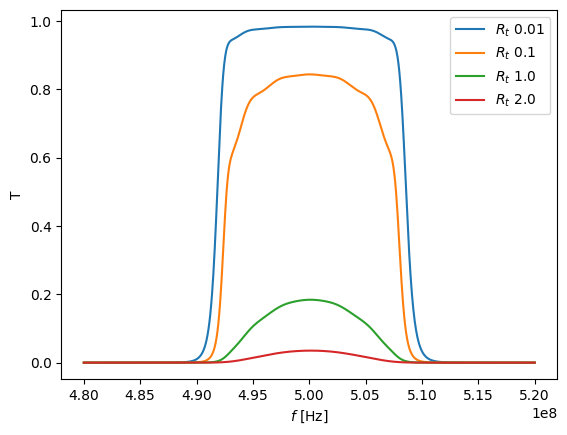

In [119]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(T_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'T')
plt.legend()

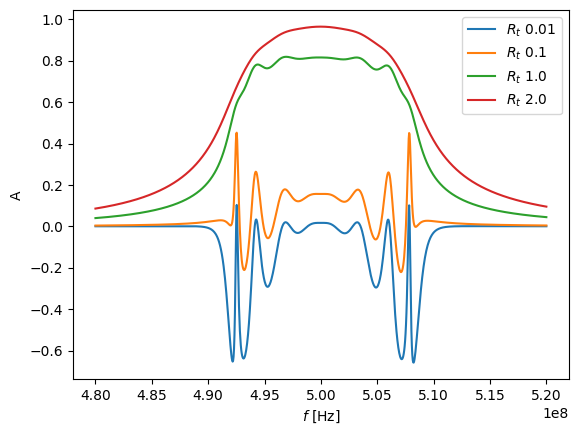

In [122]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(A_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'A')
plt.legend()